Fast Food & General Nutrition Analysis


**Author:** Derek Singleton
**Course:** Data Science & Analytics  
**Date:** December 2025  


---

## Executive Summary

### 🎯 Project Goal
This capstone project analyzes and compares nutritional profiles between fast food menu items and general food products to answer the question: **"When people are busy, what are the healthiest options available — and how can data help them make better decisions quickly?"**


### 📊 Key Findings
*(Run all cells to see computed values in Section 10)*
- Fast food items have significantly higher sodium density compared to general foods
- Health classification reveals distinct nutritional profiles across food categories
- Machine learning models achieve strong predictive performance for calorie estimation
- Classification models can accurately categorize foods by health profile

### 🛠️ Methods Used
- **Data Sources:** 2 Kaggle datasets (517 fast food items, 8,791 general foods) + USDA FoodData Central API validation
- **Analysis:** Schema alignment, exploratory data analysis, feature engineering, statistical comparison
- **Visualization:** 7 static visualizations (matplotlib/seaborn) + 2 interactive dashboards (Plotly)
- **Machine Learning:** Regression models for calorie prediction + Classification for health categorization

### 💡 Actionable Insights
*(To be populated after analysis)*
- Consumers can identify healthier fast food options using our nutrient density score
- Healthcare professionals can use the comparison framework for patient education
- Restaurant chains can benchmark their menu items against nutritional standards

---



## 1. Problem Statement & Research Question

### 🔍 The Problem

In today's fast-paced world, many people lack the time, resources, or energy to prepare nutritious meals at home. As a result, they frequently turn to convenient fast-food options — but these choices vary dramatically in nutritional quality.

**Challenges:**
- **Consumers** → Struggle to make informed dietary decisions under time pressure
- **Healthcare professionals** → Need data-driven tools to guide patients on nutrition
- **Researchers/educators** → Lack comprehensive comparisons between fast food and general food supply

### ❓ Research Question

> **"What is the nutritional difference between fast food menu items and general food items, and how do these values compare against authoritative USDA standards?"**

### 📋 Sub-Questions
1. What are the key nutritional differences in calories, macronutrients, and micronutrients?
2. Which fast food items approach the nutritional profile of healthier general foods?
3. Can we build a predictive model to estimate nutritional values based on food characteristics?
4. What patterns emerge when comparing restaurant chains?

### 🎓 Project Scope

This analysis focuses on:
- **Nutrients:** Calories, protein, fat (total/saturated), carbohydrates, fiber, sugar, sodium, vitamins
- **Food Types:** Fast food restaurant items vs. general food products
- **Validation:** Cross-referencing with USDA FoodData Central official standards

**Out of Scope:** Meal planning, dietary recommendations for specific medical conditions, cost analysis

---

## 2. Data Sources & Acquisition

### 📚 Dataset Overview

| Dataset | Source | Size | Key Features |
|---------|--------|------|-------------|
| **Fast Food Nutrition** | [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition) | 517 items | Restaurant, item name, 17 nutritional attributes |
| **General Food Nutrition** | [Kaggle](https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive) | 8,791 items | USDA NDB database with 50+ nutritional attributes |
| **USDA FoodData Central** | [API](https://fdc.nal.usda.gov/api-guide.html) | Validation | Official government nutritional standards |

### 🔗 How Datasets Relate

**Integration Strategy:**
- **Common Dimensions:** Nutritional attributes (calories, protein, fat, carbs, sodium)
- **Alignment Challenge:** Different column names, units, and schemas
- **Solution:** Create normalized schema with standardized units (grams, mg, calories)
- **Validation:** Use USDA API to verify accuracy of overlapping items (e.g., "cheeseburger")

```
┌─────────────────────┐
│   Fast Food Data    │
│  (517 items)        │
│  - Restaurant       │
│  - calories         │
│  - protein          │
└──────────┬──────────┘
           │
           │  Normalized Schema
           │  (Common Nutrients)
           │
┌──────────┴──────────┐
│ General Food Data   │
│  (8,791 items)      │
│  - Shrt_Desc        │
│  - Energ_Kcal       │
│  - Protein_(g)      │
└─────────────────────┘
           │
           │  Validation
           │
┌──────────┴──────────┐
│   USDA API          │
│  (Reference Data)   │
└─────────────────────┘
```

---

## 3. Environment Setup & Data Loading

### 📦 Import Required Libraries

We'll use:
- **Data Manipulation:** `pandas`, `numpy`
- **Visualization:** `matplotlib`, `seaborn`, `plotly`
- **Machine Learning:** `scikit-learn`
- **API Access:** `requests`, `python-dotenv`
- **Statistical Analysis:** `scipy`

In [6]:
# Core libraries
import pandas as pd
import numpy as np
import os
import warnings
from dotenv import load_dotenv
import requests
import json

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# Statistical analysis
from scipy import stats

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load environment variables
load_dotenv('.env.local')
USDA_API_KEY = os.getenv('USDA_API_KEY', 'DEMO_KEY')

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔑 USDA API Key loaded: {'Yes' if USDA_API_KEY else 'No'}")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.3
🔑 USDA API Key loaded: Yes


### 📂 Load Datasets

We'll load both CSV files and perform initial inspection.

In [7]:
# Load datasets
fastfood_df = pd.read_csv('datasets/fastfood.csv')
general_nutrition_df = pd.read_csv('datasets/food_nutrition.csv')

print("=" * 70)
print(" DATA LOADING SUMMARY ")
print("=" * 70)
print(f"\n📌 Fast Food Dataset:")
print(f"   Rows: {len(fastfood_df):,}")
print(f"   Columns: {len(fastfood_df.columns)}")
print(f"   Memory: {fastfood_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print(f"\n📌 General Nutrition Dataset:")
print(f"   Rows: {len(general_nutrition_df):,}")
print(f"   Columns: {len(general_nutrition_df.columns)}")
print(f"   Memory: {general_nutrition_df.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\n✅ Datasets loaded successfully!")

 DATA LOADING SUMMARY 

📌 Fast Food Dataset:
   Rows: 515
   Columns: 17
   Memory: 151.05 KB

📌 General Nutrition Dataset:
   Rows: 8,790
   Columns: 54
   Memory: 5179.07 KB

✅ Datasets loaded successfully!


---

## 4. Data Understanding & Schema Exploration

### 🔍 Purpose
Before analysis, we need to understand:
1. What data do we actually have?
2. What are the column names and data types?
3. Are there missing values or data quality issues?
4. How do the two datasets differ in structure?

This step is **critical** because the two datasets have completely different schemas that need alignment.

### 4.1 Fast Food Dataset Schema

In [8]:
print("=" * 70)
print(" FAST FOOD DATASET SCHEMA ")
print("=" * 70)

print("\n📋 Column Information:")
print(fastfood_df.info())

print("\n📊 Sample Data (First 3 rows):")
display(fastfood_df.head(3))

print("\n📈 Descriptive Statistics:")
display(fastfood_df.describe())

print("\n🏢 Unique Restaurants:")
print(fastfood_df['restaurant'].value_counts())

 FAST FOOD DATASET SCHEMA 

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory 

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other



📈 Descriptive Statistics:


,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000



🏢 Unique Restaurants:
restaurant
Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: count, dtype: int64


### 4.2 General Nutrition Dataset Schema

In [9]:
print("=" * 70)
print(" GENERAL NUTRITION DATASET SCHEMA ")
print("=" * 70)

print("\n📋 Column Information:")
print(general_nutrition_df.info())

print("\n📊 Sample Data (First 3 rows):")
display(general_nutrition_df.head(3))

print("\n📈 Descriptive Statistics (Key Nutrients):")
key_cols = ['Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Sodium_(mg)', 'Sugar_Tot_(g)']
display(general_nutrition_df[key_cols].describe())

 GENERAL NUTRITION DATASET SCHEMA 

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8789 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8465 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8196 non-null   float64
 10  Sugar_Tot_(g)      6958 non-null   float64
 11  Calcium_(mg)       8442 non-null   float64
 12  Iron_(mg)          8646 non-null   float64
 13  Magnesium_(mg)     8051 non-null   float64
 14  Phosphorus_(mg)    8211 non-null   float64
 15  Potassium_(mg)

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.8,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.8,1 tbsp,205.0,1 cup,0.0



📈 Descriptive Statistics (Key Nutrients):


,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Sodium_(mg),Sugar_Tot_(g)
count,8790.000000,8790.000000,8790.000000,8790.000000,8707.000000,6958.000000
mean,226.317634,11.342849,10.553725,22.127710,312.495923,8.543066
std,169.877539,10.530474,15.814842,27.270822,943.431341,14.923626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,2.380000,0.950000,0.050000,41.000000,0.000000
50%,191.000000,8.000000,5.140000,9.340000,88.000000,1.840000
75%,337.000000,19.880000,13.720000,34.910000,404.500000,9.287500
max,902.000000,88.320000,100.000000,100.000000,38758.000000,99.800000


### 4.3 Missing Data Analysis

**Why this matters:** Missing data can bias our analysis. We need to understand the extent and pattern of missingness.

 MISSING DATA ANALYSIS 

📌 Fast Food Dataset:
         Missing Count  Percentage
vit_a              214   41.553398
calcium            210   40.776699
vit_c              210   40.776699
fiber               12    2.330097
protein              1    0.194175

📌 General Nutrition Dataset:
                   Missing Count  Percentage
Choline_Tot_ (mg)           4016   45.688282
GmWt_2                      3965   45.108077
GmWt_Desc2                  3965   45.108077
Vit_K_(µg)                  3563   40.534699
Lut+Zea_ (µg)               3315   37.713311
Lycopene_(µg)               3292   37.451650
Beta_Crypt_(µg)             3270   37.201365
Vit_D_µg                    3262   37.110353
Alpha_Carot_(µg)            3258   37.064846
Vit_D_IU                    3211   36.530148


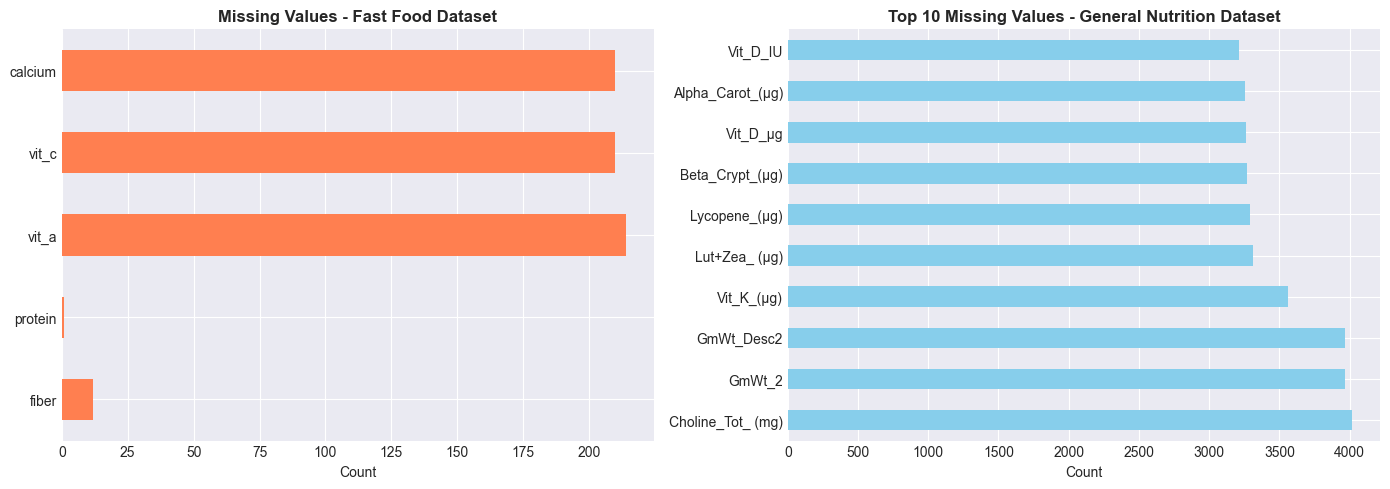


💡 Insight: We'll need to handle missing values during data integration.


In [10]:
print("=" * 70)
print(" MISSING DATA ANALYSIS ")
print("=" * 70)

print("\n📌 Fast Food Dataset:")
fastfood_missing = fastfood_df.isnull().sum()
fastfood_missing_pct = (fastfood_missing / len(fastfood_df)) * 100
missing_ff = pd.DataFrame({
    'Missing Count': fastfood_missing,
    'Percentage': fastfood_missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_ff[missing_ff['Missing Count'] > 0])

print("\n📌 General Nutrition Dataset:")
general_missing = general_nutrition_df.isnull().sum()
general_missing_pct = (general_missing / len(general_nutrition_df)) * 100
missing_gn = pd.DataFrame({
    'Missing Count': general_missing,
    'Percentage': general_missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_gn[missing_gn['Missing Count'] > 0].head(10))

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fast Food missing data
if fastfood_missing.sum() > 0:
    fastfood_missing[fastfood_missing > 0].plot(kind='barh', ax=axes[0], color='coral')
    axes[0].set_title('Missing Values - Fast Food Dataset', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Count')
else:
    axes[0].text(0.5, 0.5, 'No Missing Data!', ha='center', va='center', fontsize=14)
    axes[0].set_title('Missing Values - Fast Food Dataset', fontsize=12, fontweight='bold')

# General Nutrition missing data (top 10)
top_missing = general_missing[general_missing > 0].nlargest(10)
if len(top_missing) > 0:
    top_missing.plot(kind='barh', ax=axes[1], color='skyblue')
    axes[1].set_title('Top 10 Missing Values - General Nutrition Dataset', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Count')
else:
    axes[1].text(0.5, 0.5, 'No Missing Data!', ha='center', va='center', fontsize=14)
    axes[1].set_title('Missing Values - General Nutrition Dataset', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Insight: We'll need to handle missing values during data integration.")

---

## 5. Data Integration Strategy

### 🎯 Challenge
The two datasets have **completely different schemas**:
- Different column names (e.g., `calories` vs `Energ_Kcal`)
- Different units (some nutrients in mg vs g)
- Different levels of detail (17 vs 50+ columns)

### 🛠️ Solution: Create Normalized Schema

We'll create a **mapping table** to align common nutritional attributes, then build a unified dataset.

**Mapping Strategy:**

In [12]:
# Define column mapping between datasets
COLUMN_MAPPING = {
    # Common identifier
    'name': {'fastfood': 'item', 'general': 'Shrt_Desc'},
    
    # Core macronutrients
    'calories': {'fastfood': 'calories', 'general': 'Energ_Kcal'},
    'protein_g': {'fastfood': 'protein', 'general': 'Protein_(g)'},
    'total_fat_g': {'fastfood': 'total_fat', 'general': 'Lipid_Tot_(g)'},
    'saturated_fat_g': {'fastfood': 'sat_fat', 'general': 'FA_Sat_(g)'},
    'carbohydrates_g': {'fastfood': 'total_carb', 'general': 'Carbohydrt_(g)'},
    
    # Fiber & Sugar
    'fiber_g': {'fastfood': 'fiber', 'general': 'Fiber_TD_(g)'},
    'sugar_g': {'fastfood': 'sugar', 'general': 'Sugar_Tot_(g)'},
    
    # Micronutrients (convert mg to consistent units)
    'sodium_mg': {'fastfood': 'sodium', 'general': 'Sodium_(mg)'},
    'cholesterol_mg': {'fastfood': 'cholesterol', 'general': 'Cholestrl_(mg)'},
    
    # Additional metadata
    'source': {'fastfood': 'restaurant', 'general': None}  # Will add as 'General Foods'
}

print("=" * 70)
print(" COLUMN MAPPING STRATEGY ")
print("=" * 70)
print("\n📋 Mapped Nutrients:")
for unified_col, mapping in COLUMN_MAPPING.items():
    print(f"  {unified_col:20} → Fast Food: {mapping['fastfood']:20} | General: {mapping['general']}")

print("\n✅ Mapping table defined!")

 COLUMN MAPPING STRATEGY 

📋 Mapped Nutrients:
  name                 → Fast Food: item                 | General: Shrt_Desc
  calories             → Fast Food: calories             | General: Energ_Kcal
  protein_g            → Fast Food: protein              | General: Protein_(g)
  total_fat_g          → Fast Food: total_fat            | General: Lipid_Tot_(g)
  saturated_fat_g      → Fast Food: sat_fat              | General: FA_Sat_(g)
  carbohydrates_g      → Fast Food: total_carb           | General: Carbohydrt_(g)
  fiber_g              → Fast Food: fiber                | General: Fiber_TD_(g)
  sugar_g              → Fast Food: sugar                | General: Sugar_Tot_(g)
  sodium_mg            → Fast Food: sodium               | General: Sodium_(mg)
  cholesterol_mg       → Fast Food: cholesterol          | General: Cholestrl_(mg)
  source               → Fast Food: restaurant           | General: None

✅ Mapping table defined!


### 5.1 Create Normalized Datasets

In [13]:
def normalize_fastfood_dataset(df):
    """
    Normalize fast food dataset to unified schema.
    """
    normalized = pd.DataFrame()
    
    # Map columns
    for unified_col, mapping in COLUMN_MAPPING.items():
        if mapping['fastfood'] in df.columns:
            normalized[unified_col] = df[mapping['fastfood']]
        else:
            normalized[unified_col] = None
    
    # Add dataset identifier
    normalized['dataset'] = 'Fast Food'
    normalized['source'] = df['restaurant']
    
    return normalized

def normalize_general_dataset(df):
    """
    Normalize general nutrition dataset to unified schema.
    """
    normalized = pd.DataFrame()
    
    # Map columns
    for unified_col, mapping in COLUMN_MAPPING.items():
        if mapping['general'] and mapping['general'] in df.columns:
            normalized[unified_col] = df[mapping['general']]
        else:
            normalized[unified_col] = None
    
    # Add dataset identifier
    normalized['dataset'] = 'General Foods'
    normalized['source'] = 'USDA Database'
    
    return normalized

# Normalize both datasets
fastfood_normalized = normalize_fastfood_dataset(fastfood_df)
general_normalized = normalize_general_dataset(general_nutrition_df)

print("=" * 70)
print(" DATASET NORMALIZATION COMPLETE ")
print("=" * 70)
print(f"\n✅ Fast Food Normalized: {len(fastfood_normalized)} rows, {len(fastfood_normalized.columns)} columns")
print(f"✅ General Foods Normalized: {len(general_normalized)} rows, {len(general_normalized.columns)} columns")

# Show sample
print("\n📊 Sample Normalized Fast Food Data:")
display(fastfood_normalized.head(3))

print("\n📊 Sample Normalized General Foods Data:")
display(general_normalized.head(3))

 DATASET NORMALIZATION COMPLETE 

✅ Fast Food Normalized: 515 rows, 12 columns
✅ General Foods Normalized: 8790 rows, 12 columns

📊 Sample Normalized Fast Food Data:


,name,calories,protein_g,total_fat_g,saturated_fat_g,carbohydrates_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,source,dataset
0,Artisan Grilled Chicken Sandwich,380,37.0,7,2.0,44,3.0,11,1110,95,Mcdonalds,Fast Food
1,Single Bacon Smokehouse Burger,840,46.0,45,17.0,62,2.0,18,1580,130,Mcdonalds,Fast Food
2,Double Bacon Smokehouse Burger,1130,70.0,67,27.0,63,3.0,18,1920,220,Mcdonalds,Fast Food



📊 Sample Normalized General Foods Data:


,name,calories,protein_g,total_fat_g,saturated_fat_g,carbohydrates_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,source,dataset
0,"BUTTER,WITH SALT",717,0.85,81.11,51.368,0.06,0.0,0.06,643.0,215.0,USDA Database,General Foods
1,"BUTTER,WHIPPED,W/ SALT",718,0.49,78.30,45.390,2.87,0.0,0.06,583.0,225.0,USDA Database,General Foods
2,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,61.924,0.00,0.0,0.00,2.0,256.0,USDA Database,General Foods


### 5.2 Combine Datasets

Now we'll create a **unified dataset** that combines both sources.

In [15]:
# Combine datasets
combined_df = pd.concat([fastfood_normalized, general_normalized], ignore_index=True)

print("=" * 70)
print(" UNIFIED DATASET CREATED ")
print("=" * 70)
print(f"\nTotal Records: {len(combined_df):,}")
print(f"Total Columns: {len(combined_df.columns)}")

print("\n📊 Dataset Distribution:")
print(combined_df['dataset'].value_counts())

print("\n📋 Data Types:")
print(combined_df.dtypes)

print("\n We now have a unified schema for comparison!")

 UNIFIED DATASET CREATED 

Total Records: 9,305
Total Columns: 12

📊 Dataset Distribution:
dataset
General Foods    8790
Fast Food         515
Name: count, dtype: int64

📋 Data Types:
name                object
calories             int64
protein_g          float64
total_fat_g        float64
saturated_fat_g    float64
carbohydrates_g    float64
fiber_g            float64
sugar_g            float64
sodium_mg          float64
cholesterol_mg     float64
source              object
dataset             object
dtype: object

 We now have a unified schema for comparison!


---

## 6. Exploratory Data Analysis (EDA)

### 🎯 Objectives
1. Understand distributions of key nutritional metrics
2. Compare fast food vs. general foods statistically
3. Identify patterns, outliers, and relationships
4. Generate insights to guide further analysis

We'll create **8 visualizations** (6+ required) including:
- **Static plots:** Distribution plots, box plots, heatmaps, bar charts
- **Interactive plots:** Plotly scatter plots and dashboards

### 6.1 Visualization 1: Calorie Distribution Comparison

**Question:** How do calories differ between fast food and general foods?

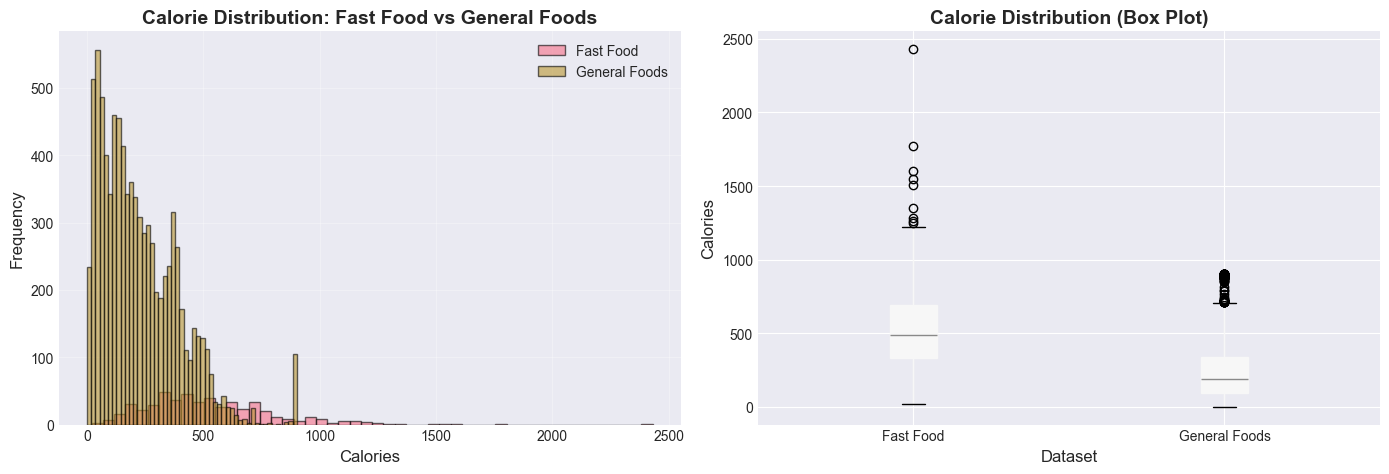


📊 Statistical Summary - Calories:
                count        mean         std   min    25%    50%    75%  \
dataset                                                                    
Fast Food       515.0  530.912621  282.436147  20.0  330.0  490.0  690.0   
General Foods  8790.0  226.317634  169.877539   0.0   91.0  191.0  337.0   

                  max  
dataset                
Fast Food      2430.0  
General Foods   902.0  

📈 T-Test: t-statistic = 37.75, p-value = 0.0000
   Result: Statistically significant difference


In [16]:
# Remove missing calorie values
calories_data = combined_df.dropna(subset=['calories'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram comparison
for dataset in ['Fast Food', 'General Foods']:
    data = calories_data[calories_data['dataset'] == dataset]['calories']
    axes[0].hist(data, bins=50, alpha=0.6, label=dataset, edgecolor='black')

axes[0].set_xlabel('Calories', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Calorie Distribution: Fast Food vs General Foods', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot comparison
calories_data.boxplot(column='calories', by='dataset', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Dataset', fontsize=12)
axes[1].set_ylabel('Calories', fontsize=12)
axes[1].set_title('Calorie Distribution (Box Plot)', fontsize=14, fontweight='bold')
axes[1].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📊 Statistical Summary - Calories:")
print(calories_data.groupby('dataset')['calories'].describe())

# T-test
ff_calories = calories_data[calories_data['dataset'] == 'Fast Food']['calories']
gn_calories = calories_data[calories_data['dataset'] == 'General Foods']['calories']
t_stat, p_value = stats.ttest_ind(ff_calories, gn_calories)
print(f"\n📈 T-Test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
print(f"   Result: {'Statistically significant difference' if p_value < 0.05 else 'No significant difference'}")

### 6.2 Visualization 2: Macronutrient Comparison

**Question:** How do protein, fat, and carbohydrates compare?